<a href="https://colab.research.google.com/github/tstakuma/git-practice/blob/main/%E7%9B%B8%E9%96%A2%E3%81%A8%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

車のデータを取得

numpy, pandas, mtplotlob, seabornをインストール

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 10,6

In [9]:
df = pd.read_csv('auto-mpg.csv')
df.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Year          392 non-null    int64  
 7   Origin        392 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 24.6+ KB


In [13]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


*目標値はMPG（燃費）

相関係数はパラメトリック検定の手法
→正規分布を仮定できる場合に使用

* 相関係数（$r$）は常に -1 ≦ r ≦ 1
$r$ が正の場合を正の相関、負の場合を負の相

* $r$ の絶対値が大きいほど、2 変数の相関は強い
* $r$ が正の場合を正の相関、負の場合を負の相関


２変数の量的データを確認するときには散布図が有効

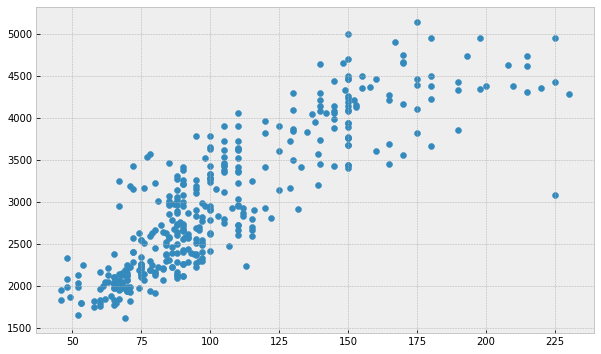

In [15]:
plt.scatter(df['Horsepower'], df['Weight']);

相関係数は.corr()で確認

In [18]:
df[['Horsepower','Weight']].corr()

,Horsepower,Weight
Horsepower,1.000000,0.864538
Weight,0.864538,1.000000


外れ値を削除

In [23]:
_df = df[['Horsepower', 'Weight']].drop(df.index[(df['Horsepower']==225.0) & (df['Weight']==3086.0)])
len(_df)

391

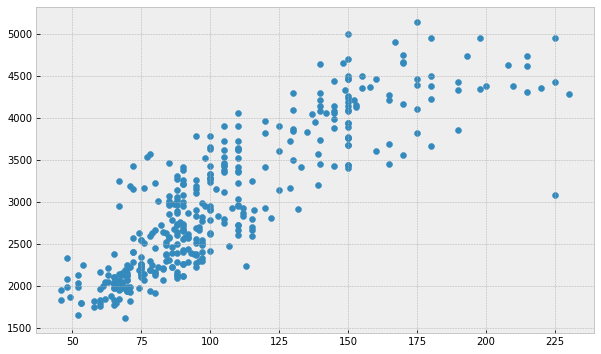

In [24]:
plt.scatter(df['Horsepower'], df['Weight']);

In [26]:
_df.corr()

,Horsepower,Weight
Horsepower,1.000000,0.874596
Weight,0.874596,1.000000


相関分析は回帰係数を出して終了ではない。→相関係数が０から離れていても、母集団も同じかは本質的に分からないから
# **仮説検定は母集団が対象**
母集団にも同様の相関があると言えるか同化を検定する必要がある
**→無相関検定を行う**
無相関検定では以下のように仮説を立てて検定を行う。



* 帰無仮説 $H_{0}$：母相関係数は0である (同様の相関はない)
* 対立仮説$H_{1}$：母相関係数は0ではない

Scipyを用いて実装

In [28]:
from scipy import stats

In [30]:
r, pvalue = stats.pearsonr(_df['Horsepower'], _df['Weight'])
print(f'相関係数 : {r}')
print(f'p 値 : {pvalue}')

相関係数 : 0.874595623086128
p 値 : 2.327476009647787e-124


p値 < 5%　→帰無仮説を棄却
==母集団にも相関があることが証明

相関行列をPandasのDataFrame型で一度に算出する

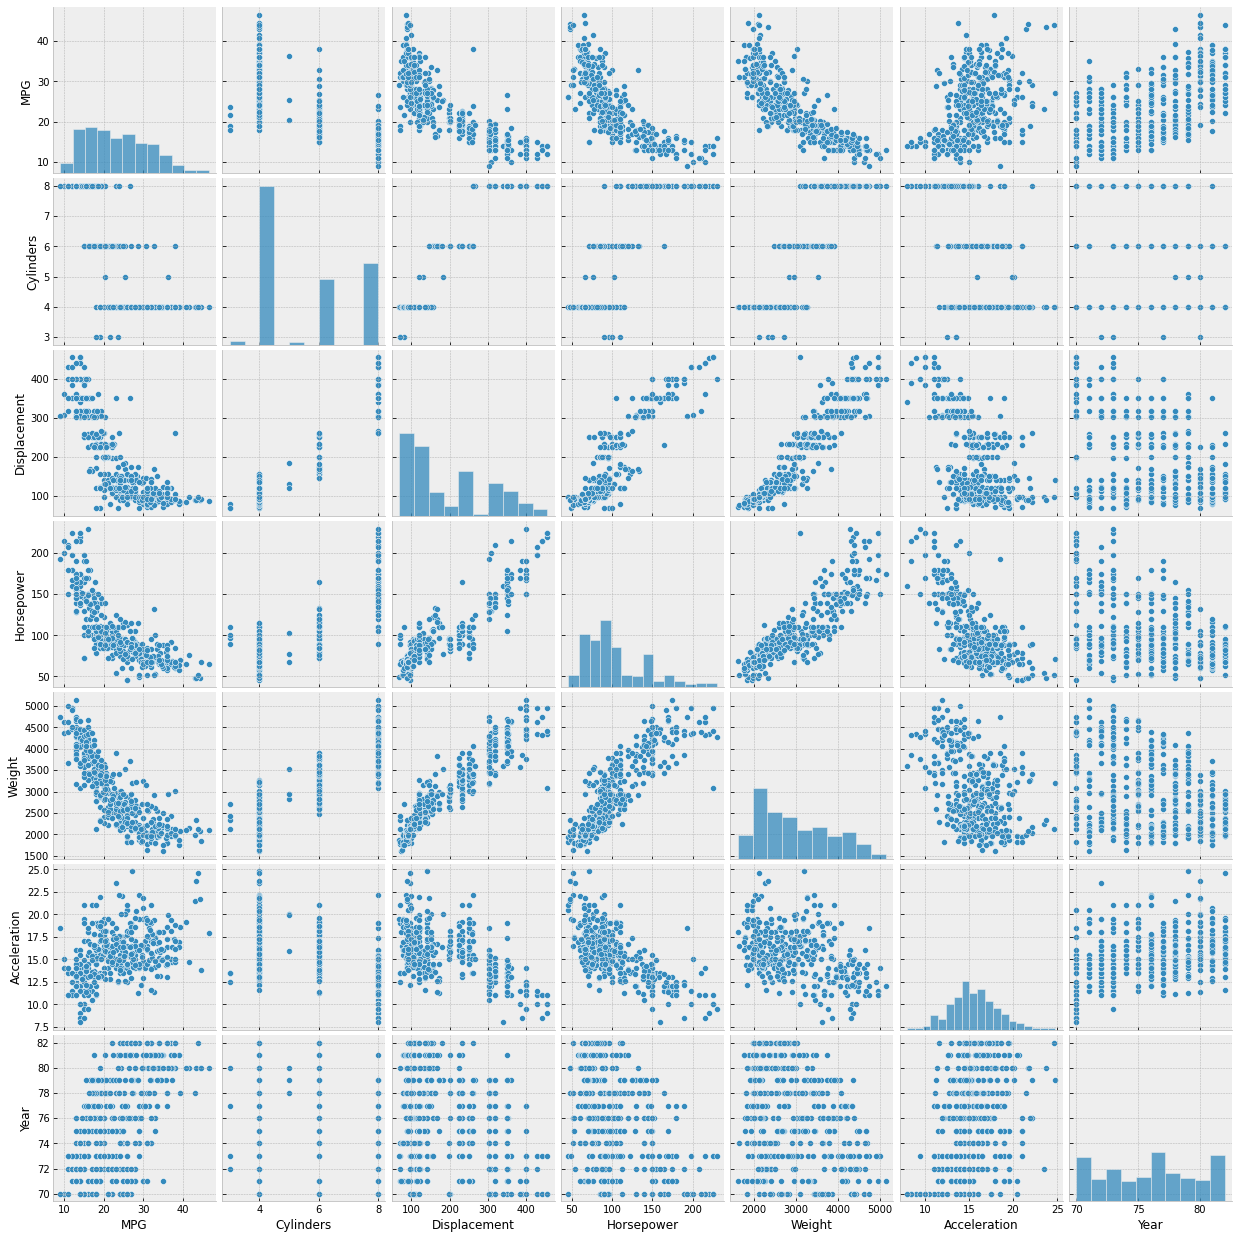

In [32]:
sns.pairplot(df);

In [34]:
df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


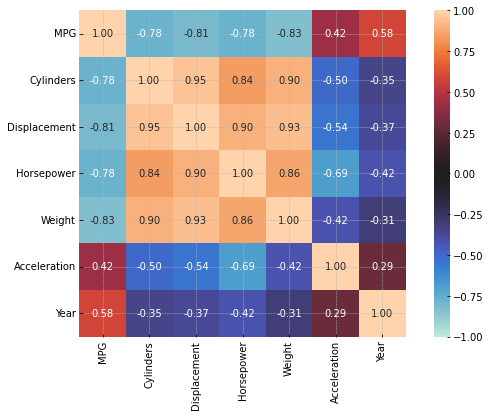

In [40]:
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

ここまでの流れ

単変量解析の手法として相関分析を行った。
→変数AとBの関係性の強さをみるもの＝ごく稀



多くの場合
変数Aに対する変数Bの関係やその逆を見たい

回帰分析

回帰分析；目的変数が連続値
ex. MPG(燃費)、株価

分類：目的変数が離散値
==*カテゴリの概念*
ex. ワインの等級

stasmodelというライブラリをimport
回帰分析を含めて複数の統計分析手法を艦隊に実装できるライブラリ

In [47]:
import statsmodels.api as sm

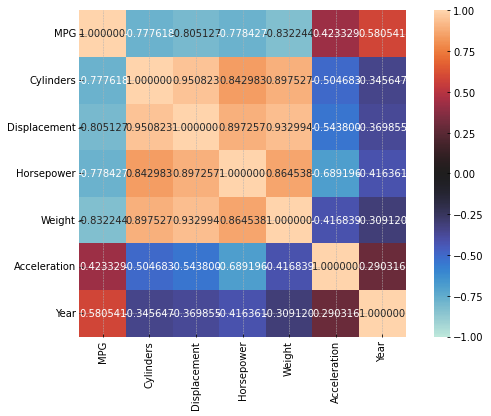

In [49]:
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='2f');

statsmodelでは回帰分析をOLS()というクラスを使用して実装する

In [52]:
y = df['MPG']
x = df['Weight']

クラスを使用する際にはインスタンス化が必要

In [57]:
np.random.seed(0)

statsmodelで回帰分析を行う場合、デフォルトでは切片が計算されない

In [58]:
sm.add_constant(x).head(3)

,const,Weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0


In [65]:
simple_ols = sm.OLS(y, sm.add_constant(x))

In [67]:
result = simple_ols.fit()

In [70]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          6.02e-102
Time:                        07:24:18   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
Weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
result.params

const     46.216525
Weight    -0.007647
dtype: float64

**単回帰分析**
#  y=ax＋b

#   MPG= -0.007647 x Weight ＋ 46.216525


結果の解釈  決定係数

回帰式でデータをどの程度うまく表現できているか＝当てはまりの良さ
最大が１

In [72]:
result.rsquared

0.6926304331206254

結果の解釈　p値

In [73]:
result.pvalues

const     1.623069e-193
Weight    6.015296e-102
dtype: float64

予測分析

In [75]:
pred = result.predict()
pred[:3]

array([19.4202363 , 17.97488856, 19.9402556 ])

In [78]:
df['MPG'][:3]

0    18.0
1    15.0
2    18.0
Name: MPG, dtype: float64

回帰直線の可視化

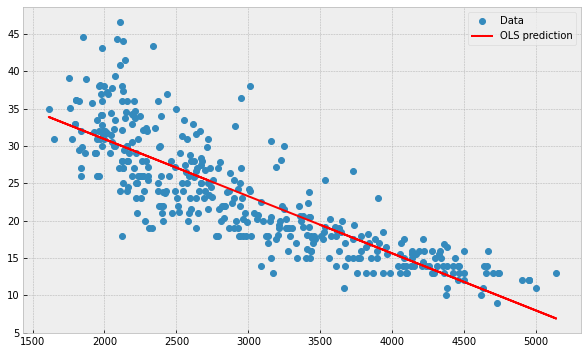

In [81]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label="Data")
ax.plot(x, pred, 'r', label="OLS prediction")
ax.legend(loc="best");

重回帰分析



*   要因分析：複数ある要因（説明変数）のうち、目的変数に関連している度合いの大きいものを調べること

*   予測分析：要因分析を元に重回帰式を求めて未来の値を予測すること




重回帰分析の偏回帰係数は、用いている複数の説明変数を考慮した上での目的変数に対するそれぞれの影響度合いが算出される

重回帰分析の注意点

入力されいている説明変数の値の大きさの違いにより、正しく本来の影響度合いを測れない場合がある
→単位など

データの準備

データの単位などスケールを統一する
＝標準化

説明変数ごとを平均０標準偏差１になるようにする変換

scikit-learnというライブラリのStandardScalerを使用する

→機械学習用のライブラリ


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [87]:
x = df.drop(['MPG', 'Origin'], axis=1)
y = df['MPG']
x.head(3)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70


In [94]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ,
        -1.62531533],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362,
        -1.62531533],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924,
        -1.62531533],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ,
         1.63640964],
       [-0.86401356, -0.7120053 , -0.66254009, -0.41562716,  1.11008813,
         1.63640964],
       [-0.86401356, -0.72157372, -0.58450051, -0.30364091,  1.40043312,
         1.63640964]])

In [96]:
multi_ols = sm.OLS(y, sm.add_constant(x_scaled))
result = multi_ols.fit()

In [98]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          3.79e-135
Time:                        07:47:12   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.174    135.130      0.000      23.105      23.787
x1            -0.5619      0.566     -0.993      0.321      -1.674       0.550
x2             0.8025      0.769      1.044      0.297      -0.709       2.314
x3            -0.0150      0.532     -0.028      0.977      -1.061       1.031
x4            -5.7640      0.568    -10.141      0.000      -6.882      -4.646
x5             0.2350      0.281      0.836      0.404      -0.318       0.788
x6             2.7717      0.194     14.318      0.000       2.391       3.152
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

結果の解釈　自由度調整済み決定係数

決定係数は説明変数の数が増えるほど１に近づく

In [100]:
result.rsquared_adj

0.8062826441922383

要因分析

In [102]:
result.params

const    23.445918
x1       -0.561950
x2        0.802476
x3       -0.015045
x4       -5.764000
x5        0.234957
x6        2.771664
dtype: float64

t値は偏回帰係数毎に算出されており、絶対値的に大きいほど目的変数に対する影響が大きい

In [105]:
result.pvalues

const    0.000000e+00
x1       3.212169e-01
x2       2.973318e-01
x3       9.774501e-01
x4       1.416190e-21
x5       4.038303e-01
x6       1.410428e-37
dtype: float64

In [106]:
result.tvalues

const    135.130285
x1        -0.993240
x2         1.043586
x3        -0.028284
x4       -10.140877
x5         0.835721
x6        14.317630
dtype: float64

予測分析

回帰分析などの数理モデルは一般的に説明変数が増えると精度が向上する傾向

In [108]:
pred = result.predict(sm.add_constant(x_scaled))
pred[:3]

array([15.08291904, 14.07257469, 15.53631544])

予測分析の注意点

標準化した値を使用した場合は予測時にも標準化したものを使用

In [109]:
pred = result.predict(sm.add_constant(x_scaled))
pred[:3]

array([15.08291904, 14.07257469, 15.53631544])

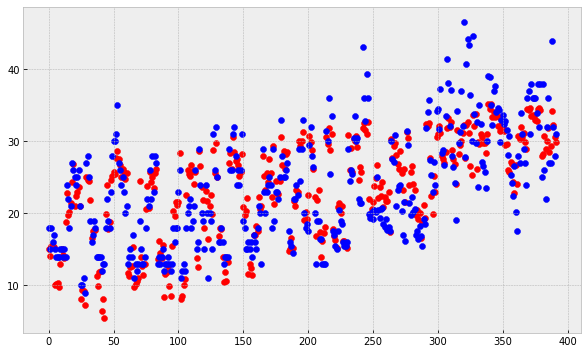

In [111]:
num = list(range(0, len(x)))
plt.scatter(num, pred, c='red');
plt.scatter(num,y,c='blue');

変数選択

あまりに相関の高いデータ同士が含まれていると１つのことを複数の説明変数で重複して説明することになる

重回帰式の解釈を誤る（or式が求められない）リスク

このリスクを多重共線性という

変数を必要に応じて除いたり加えたりして多重共線性を防ぐ



1.   多重共線性による問題を避けるため

2.   真に効いている要因を絞り込んだ重回帰式のほうが、より精度の高い回帰式（最適な回帰モデル）になる場合があるため



変数減少法

予め相関毛イスを確認し、相関の高い変数を削って結果見る

In [113]:
params = result.params.rename({
    'x1':'Cylinders', 
    'x2':'Displacement',
    'x3':'Horsepower',
    'x4':'Weight',
    'x5':'Acceleration',
    'x6':'Year'
    })

In [114]:
np.sign(params) - np.sign(df.corr()['MPG'].drop('MPG', axis=0))

Acceleration    0.0
Cylinders       0.0
Displacement    2.0
Horsepower      0.0
Weight          0.0
Year            0.0
const           NaN
dtype: float64